In [1]:
import numpy as np
import pandas as pd
from sklearn.externals import joblib
import warnings
import os
from collections import Counter
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
% matplotlib inline

/Users/sli/.pyenv/versions/3.6.0/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/sli/.pyenv/versions/3.6.0/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
filename = '1534264843'
search_path = '/Users/sli/Projects/data/hyperparameter_search/mental_health_forum_simple_clf'
hy_search_table = pd.read_csv(os.path.join(*[search_path, f'result{filename}.csv']), index_col='Unnamed: 0')

In [3]:
hy_search_table

,balanced,binary,classifier,multiclass,ngram_range,stemming,tfidf,tokenizer,train_f1,dev_f1,min_rate,max_rate,dev_f1_sg,dev_size,feature_num,train_f1_sg,train_size
0,False,False,LinearSVM,OnevsRest,"[0, 1]",lemma,True,spell,0.9510,0.6628,1.0000,1.0000,0.6071 0.6954 0.6379 0.6436 0.6007 0.6989 0.7557,4444.0,40413.0,0.9648 0.9591 0.9497 0.9452 0.9318 0.9581 0.9483,17772.0
1,False,False,LinearSVM,OnevsRest,"[0, 1]",lemma,True,casual,0.9603,0.6619,1.0000,1.0000,0.6036 0.6985 0.6439 0.6441 0.6038 0.6957 0.7439,4444.0,59325.0,0.9674 0.9683 0.9598 0.9572 0.9437 0.9661 0.9594,17772.0
2,False,False,LinearSVM,OnevsRest,"[0, 1]",lemma,False,spell,0.9899,0.5826,1.0000,1.0000,0.4824 0.6235 0.5803 0.5744 0.5336 0.6241 0.6598,4444.0,40413.0,0.9974 0.989 0.9923 0.9857 0.983 0.9924 0.9895,17772.0
3,False,False,LinearSVM,OnevsRest,"[0, 1]",lemma,False,casual,0.9922,0.5782,1.0000,1.0000,0.4569 0.6254 0.5727 0.5723 0.5435 0.5972 0.6791,4444.0,59325.0,0.9974 0.9919 0.9938 0.9897 0.9873 0.9935 0.9918,17772.0
4,False,False,LinearSVM,OnevsRest,"[0, 1]",stem,True,spell,0.9244,0.6632,1.0000,1.0000,0.5814 0.6919 0.6559 0.6391 0.6065 0.7099 0.7579,4444.0,30665.0,0.939 0.9417 0.9168 0.9152 0.8932 0.9405 0.9242,17772.0
5,False,False,LinearSVM,OnevsRest,"[0, 1]",stem,True,casual,0.9404,0.6618,1.0000,1.0000,0.5581 0.6939 0.6513 0.646 0.614 0.7129 0.7561,4444.0,47131.0,0.9525 0.9533 0.9355 0.9351 0.917 0.9483 0.9412,17772.0
6,False,False,LinearSVM,OnevsRest,"[0, 1]",stem,False,spell,0.9795,0.5802,1.0000,1.0000,0.4607 0.6198 0.5813 0.5727 0.5399 0.6087 0.678,4444.0,30665.0,0.9922 0.9812 0.9807 0.9723 0.9667 0.9867 0.9766,17772.0
7,False,False,LinearSVM,OnevsRest,"[0, 1]",stem,False,casual,0.9848,0.5859,1.0000,1.0000,0.4444 0.6287 0.5836 0.5884 0.5546 0.624 0.6774,4444.0,47131.0,0.9935 0.9863 0.9876 0.9801 0.9742 0.9896 0.9821,17772.0
8,False,False,LinearSVM,OnevsRest,"[0, 1]",lemma,True,spell,0.8613,0.6337,0.0014,0.1429,0.6067 0.6841 0.5487 0.6238 0.5543 0.6857 0.7329,4444.0,4300.0,0.8984 0.8713 0.8204 0.8464 0.8022 0.8903 0.9,17772.0
9,False,False,LinearSVM,OnevsRest,"[0, 1]",lemma,True,casual,0.8623,0.6293,0.0014,0.1429,0.5922 0.6735 0.5556 0.6217 0.5565 0.6805 0.7251,4444.0,4338.0,0.8952 0.8761 0.827 0.8463 0.8036 0.8907 0.8973,17772.0


In [4]:
hy_search_table.sort_values(by='dev_f1', ascending=False).head()

,balanced,binary,classifier,multiclass,ngram_range,stemming,tfidf,tokenizer,train_f1,dev_f1,min_rate,max_rate,dev_f1_sg,dev_size,feature_num,train_f1_sg,train_size
4,False,False,LinearSVM,OnevsRest,"[0, 1]",stem,True,spell,0.9244,0.6632,1.0,1.0,0.5814 0.6919 0.6559 0.6391 0.6065 0.7099 0.7579,4444.0,30665.0,0.939 0.9417 0.9168 0.9152 0.8932 0.9405 0.9242,17772.0
0,False,False,LinearSVM,OnevsRest,"[0, 1]",lemma,True,spell,0.9510,0.6628,1.0,1.0,0.6071 0.6954 0.6379 0.6436 0.6007 0.6989 0.7557,4444.0,40413.0,0.9648 0.9591 0.9497 0.9452 0.9318 0.9581 0.9483,17772.0
40,False,False,LinearSVM,OnevsRest,"[0, 1]",lemma,True,spell,0.9510,0.6628,1.0,1.0,0.6071 0.6954 0.6379 0.6436 0.6007 0.6989 0.7557,4444.0,40413.0,0.9648 0.9591 0.9497 0.9452 0.9318 0.9581 0.9483,17772.0
1,False,False,LinearSVM,OnevsRest,"[0, 1]",lemma,True,casual,0.9603,0.6619,1.0,1.0,0.6036 0.6985 0.6439 0.6441 0.6038 0.6957 0.7439,4444.0,59325.0,0.9674 0.9683 0.9598 0.9572 0.9437 0.9661 0.9594,17772.0
41,False,False,LinearSVM,OnevsRest,"[0, 1]",lemma,True,casual,0.9603,0.6619,1.0,1.0,0.6036 0.6985 0.6439 0.6441 0.6038 0.6957 0.7439,4444.0,59325.0,0.9674 0.9683 0.9598 0.9572 0.9437 0.9661 0.9594,17772.0


In [5]:
# Obtain the top n to analyze
top_n = 0
test = hy_search_table.sort_values(by='dev_f1', ascending=False).iloc[top_n]

In [6]:
# Reload model
model = joblib.load(os.path.join(*[search_path, 'save_model', filename, 'model_' + str(test.name)+'.sav']))
label_encoder = joblib.load(os.path.join(*[search_path, 'save_model', filename, 'label_encoder_' + str(test.name)+'.sav']))
word_vec_map = joblib.load(os.path.join(*[search_path, 'save_model', filename, 'word_vec_map_' + str(test.name)+'.sav']))

In [7]:
ordered_index = np.arange(7)
label_name_num = [str(num)+':'+name for name, num, in zip(label_encoder.inverse_transform(ordered_index), ordered_index)]

feature_names = word_vec_map
disorder_dict = dict()
for i in range(model.coef_.shape[0]):
    coef = np.round(np.abs(model.coef_[i,:]), 2)
    feature_idx = coef.argsort()[-10:][::-1]
    key_feature = [{feature_names[i]: coef[i]} for i in feature_idx]
    disorder_dict[label_name_num[i].split(':')[-1]] = key_feature

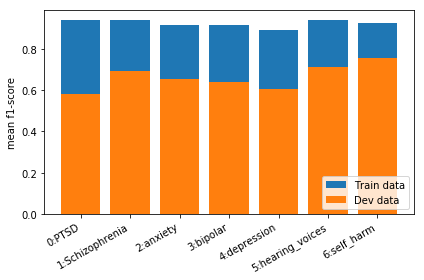

In [45]:
# Obtain the class-wise performance
def split_f1_sg(f1_sg):
    return [float(a) for a in f1_sg.split(' ')]

train_f1_sg = split_f1_sg(test.train_f1_sg)
dev_f1_sg = split_f1_sg(test.dev_f1_sg)

fig = plt.figure()
plt.bar(label_name_num, train_f1_sg, label='Train data')
plt.bar(label_name_num, dev_f1_sg, label='Dev data')

plt.ylabel('mean f1-score')
fig.autofmt_xdate()
plt.tight_layout()
plt.legend(loc='lower right')

In [9]:
pd.DataFrame(disorder_dict)

,PTSD,Schizophrenia,anxiety,bipolar,depression,hearing_voices,self_harm
0,{'ptsd': 5.25},{'schizophrenia': 7.22},{'anxieti': 6.79},{'bipolar': 7.42},{'depress': 5.65},{'voic': 4.11},{'sh': 5.16}
1,{'flashback': 3.19},{'schizophren': 3.75},{'bipolar': 4.59},{'schizophrenia': 5.82},{'bipolar': 5.1},{'schizophrenia': 2.88},{'scar': 3.88}
2,{'trauma': 2.84},{'bipolar': 3.12},{'depress': 3.75},{'manic': 4.72},{'schizophrenia': 4.67},{'respond': 1.86},{'harm': 3.59}
3,{'emdr': 2.27},{'depot': 2.76},{'anxiou': 3.44},{'schizophren': 2.98},{'anxieti': 3.65},{'baha': 1.82},{'shing': 2.65}
4,{'traumat': 2.16},{'risperd': 2.65},{'schizophrenia': 3.0},{'cyclothymia': 2.94},{'manic': 3.38},{'regardsadrienn': 1.71},{'urg': 2.63}
5,{'rape': 1.72},{'sz': 2.54},{'voic': 2.96},{'voic': 2.89},{'voic': 2.99},{'depot': 1.66},{'self': 2.36}
6,{'schizophrenia': 1.67},{'depress': 2.51},{'panic': 2.76},{'stan': 2.79},{'cyclothymia': 2.69},{'bipolar': 1.65},{'stitch': 2.17}
7,{'miscarriag': 1.43},{'diddi': 2.25},{'psychosi': 2.31},{'anxieti': 2.79},{'ptsd': 2.64},{'anxieti': 1.63},{'depress': 2.09}
8,{'dissoci': 1.35},{'anxieti': 2.25},{'sh': 2.29},{'bp': 2.65},{'schizophren': 2.63},{'instruct': 1.61},{'si': 2.03}
9,{'meant': 1.31},{'feather': 2.18},{'cider': 2.21},{'mania': 2.59},{'stabl': 2.4},{'depress': 1.58},{'voic': 1.97}


#### Error analysis

In [10]:
train_data = np.load(os.path.join(*[search_path, 'save_model', filename, 'train_data' + str(test.name)+'.npy']))
dev_data = np.load(os.path.join(*[search_path, 'save_model', filename, 'dev_data' + str(test.name)+'.npy']))

In [11]:
train_data.shape

(17772, 2)

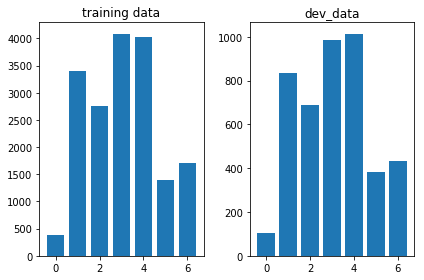

In [12]:
fig, ax = plt.subplots(1,2)
ax[0].bar(Counter(train_data[:,0]).keys(), Counter(train_data[:,0]).values())
ax[0].set_title('training data')
ax[1].bar(Counter(dev_data[:,0]).keys(), Counter(dev_data[:,0]).values())
ax[1].set_title('dev_data')
plt.tight_layout()

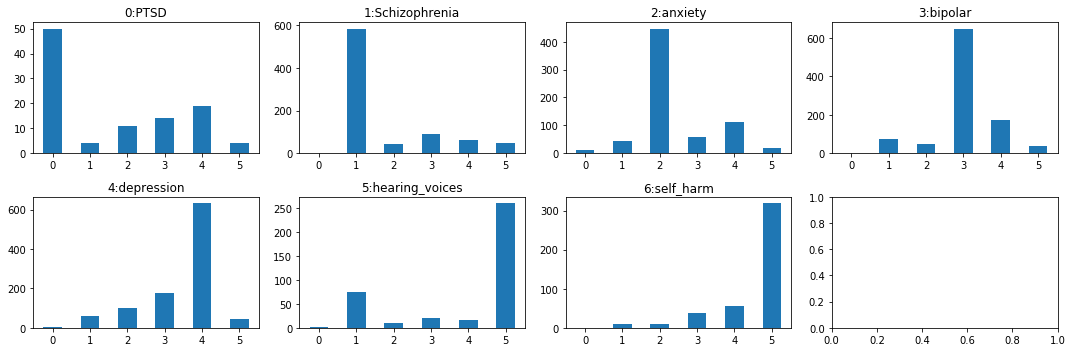

In [52]:
fig, ax = plt.subplots(2,4)
fig.set_figheight(5)
fig.set_figwidth(15)
for i in range(len(ordered_index)):
    ax[int(i/4), int(i % 4)].set_title(label_name_num[i])
    #train_index = np.where(train_data[:,0] == i)[0]
    dev_index = np.where(dev_data[:, 0] == i)[0]
    #ax[int(i/4), int(i % 4)].hist(train_data[train_index,1])
    ax[int(i/4), int(i % 4)].hist(dev_data[dev_index,1], bins=np.arange(7), align='left', rwidth=0.5)
plt.tight_layout()

Strategies to improve model performance
1. Over/undersampling: not helpful
2. ngrams: not helpful
2. Reformat tfidf to better suit the multiclass classification task: how many classes have the word appear at
3. Try lemmatization instead of stemming


Analyze correlation between feature importance

In [14]:
model.coef_.shape

(7, 30665)

In [15]:
coef_df = pd.DataFrame(model.coef_.transpose(), columns=label_name_num)

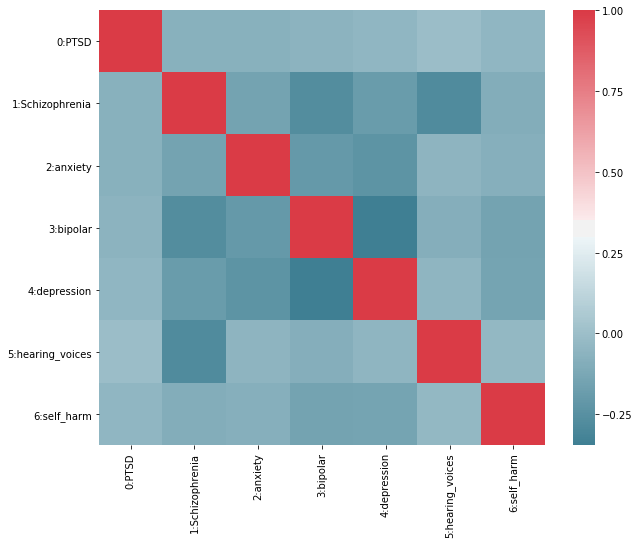

In [35]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = coef_df.corr()
sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True), ax=ax)

In [25]:
# Regenerate data vector

In [26]:
# Calculate correlation coeffecitient